<a href="https://colab.research.google.com/github/Nevil844/cartoon-effect-on-image-opencv/blob/main/detailed_trail_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [244]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load Image

In [245]:
def read_file(filename):
  img=cv2.imread(filename)
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

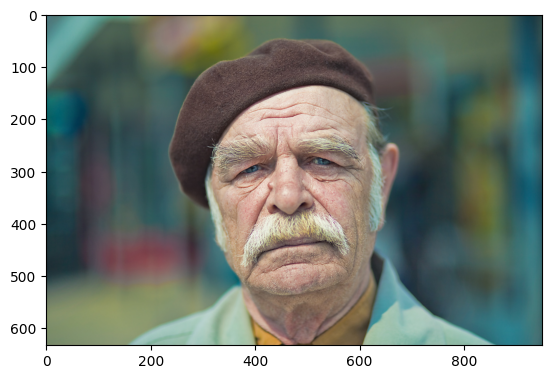

In [246]:
filename="image1.jpg"
img=read_file(filename)

org_img=np.copy(img)

Create Edge Mask

Input: Input Image

Output: Edges of *Image*

In [247]:
def edge_mask(img, line_size, blur_value):
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur=cv2.medianBlur(gray,blur_value)

  edges=cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, line_size, blur_value)

  return edges

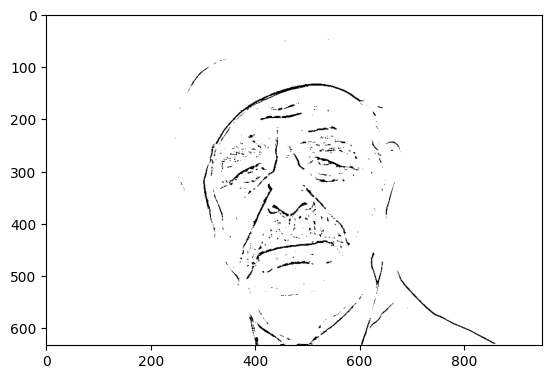

In [248]:
line_size, blur_value=7,7
edges=edge_mask(img, line_size, blur_value)

plt.imshow(edges, cmap='gray')
plt.show()

Reduce the Color Palette

In [249]:
def color_quantization(img, k):
  #Transform the image
  data=np.float32(img).reshape((-1,3))

  #Determine Criteria
  criteria=(cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

  #Implement K-Means
  ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center=np.int8(center)

  result=center[label.flatten()]
  result=result.reshape(img.shape)

  return result

Image Quantization

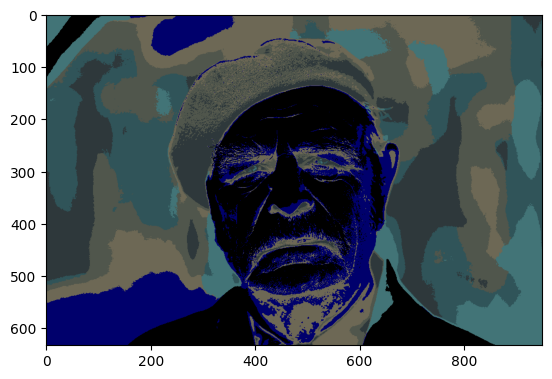

In [250]:
img=color_quantization(img, k=9)

plt.imshow(img)
plt.show()

Reduce the noise

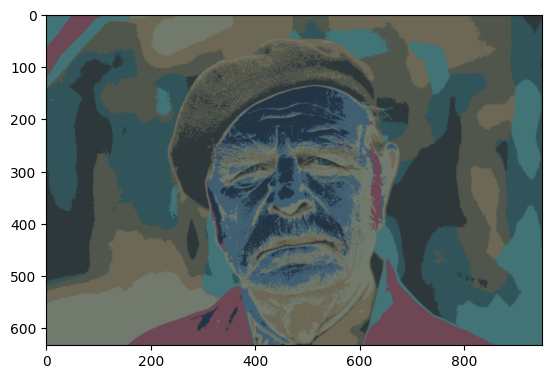

In [251]:
img = cv2.convertScaleAbs(img)
blurred = cv2.bilateralFilter(img, d = 3, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

Combine Edge Mask with the quantiz img

In [252]:
def cartoon():
  c=cv2.bitwise_and(blurred,blurred,mask=edges)

  plt.imshow(c)
  plt.title("Cartoonified Image")
  plt.show()

  plt.imshow(org_img)
  plt.title("Original Image")
  plt.show()

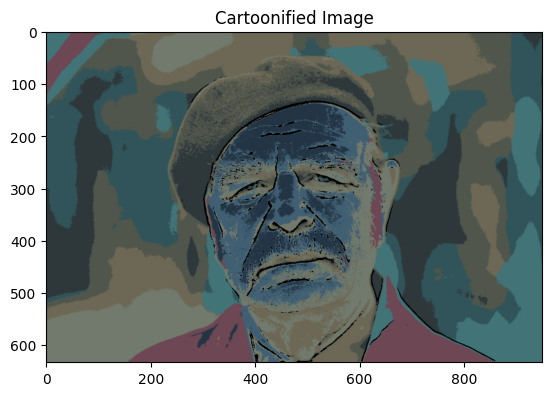

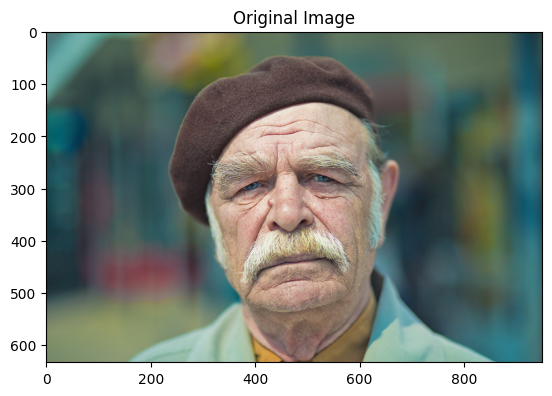

In [253]:
cartoon()